In [22]:
import sys
sys.path.append('../../')
from SynTemp.SynUtils.utils import load_database, load_from_pickle

## 1. Split data

In [3]:
import pandas as pd
from SynTemp.SynUtils.utils import train_val_test_split_df, save_database
original_data = load_database('../../Data/Temp/data_aam.json.gz')
original_data = pd.DataFrame(original_data)

train, test, valid = train_val_test_split_df(original_data, target='class')
train, test, valid = train.to_dict('records'), test.to_dict('records'), valid.to_dict('records')

save_database(train, '../../Data/Temp/Benchmark/train.json.gz')
save_database(test, '../../Data/Temp/Benchmark/test.json.gz')
save_database(valid, '../../Data/Temp/Benchmark/valid.json.gz')

# Count number of templates

In [23]:
raw = load_from_pickle('../../Data/Temp/Benchmark/Raw/templates.pkl.gz')
complete = load_from_pickle('../../Data/Temp/Benchmark/Complete/templates.pkl.gz')
expand = load_from_pickle('../../Data/Temp/Benchmark/Expand/templates.pkl.gz')

In [24]:
def calculate(data):
    number = []
    for i in range(len(data)):
        number.append(len(data[i]))
    return number

In [25]:
raw_result = calculate(raw)
complete_result = calculate(complete)
expand_result = calculate(expand)

In [26]:
print(raw_result)
print(complete_result)
print(expand_result)

[313, 1577, 9798, 22248]
[297, 1499, 9448, 21638]
[341, 1626, 9964, 22731]


# Analyze descriptors

In [15]:
complete = load_from_pickle('../../Data/Temp/Benchmark/Complete/templates.pkl.gz')
data_cluster = load_from_pickle('../../Data/Temp/Benchmark/Complete/data_cluster.pkl.gz')
temp_0 = complete[0]

In [21]:
len(train)

40012

In [23]:
len(temp_0)

297

In [22]:
33690/40012

0.841997400779766

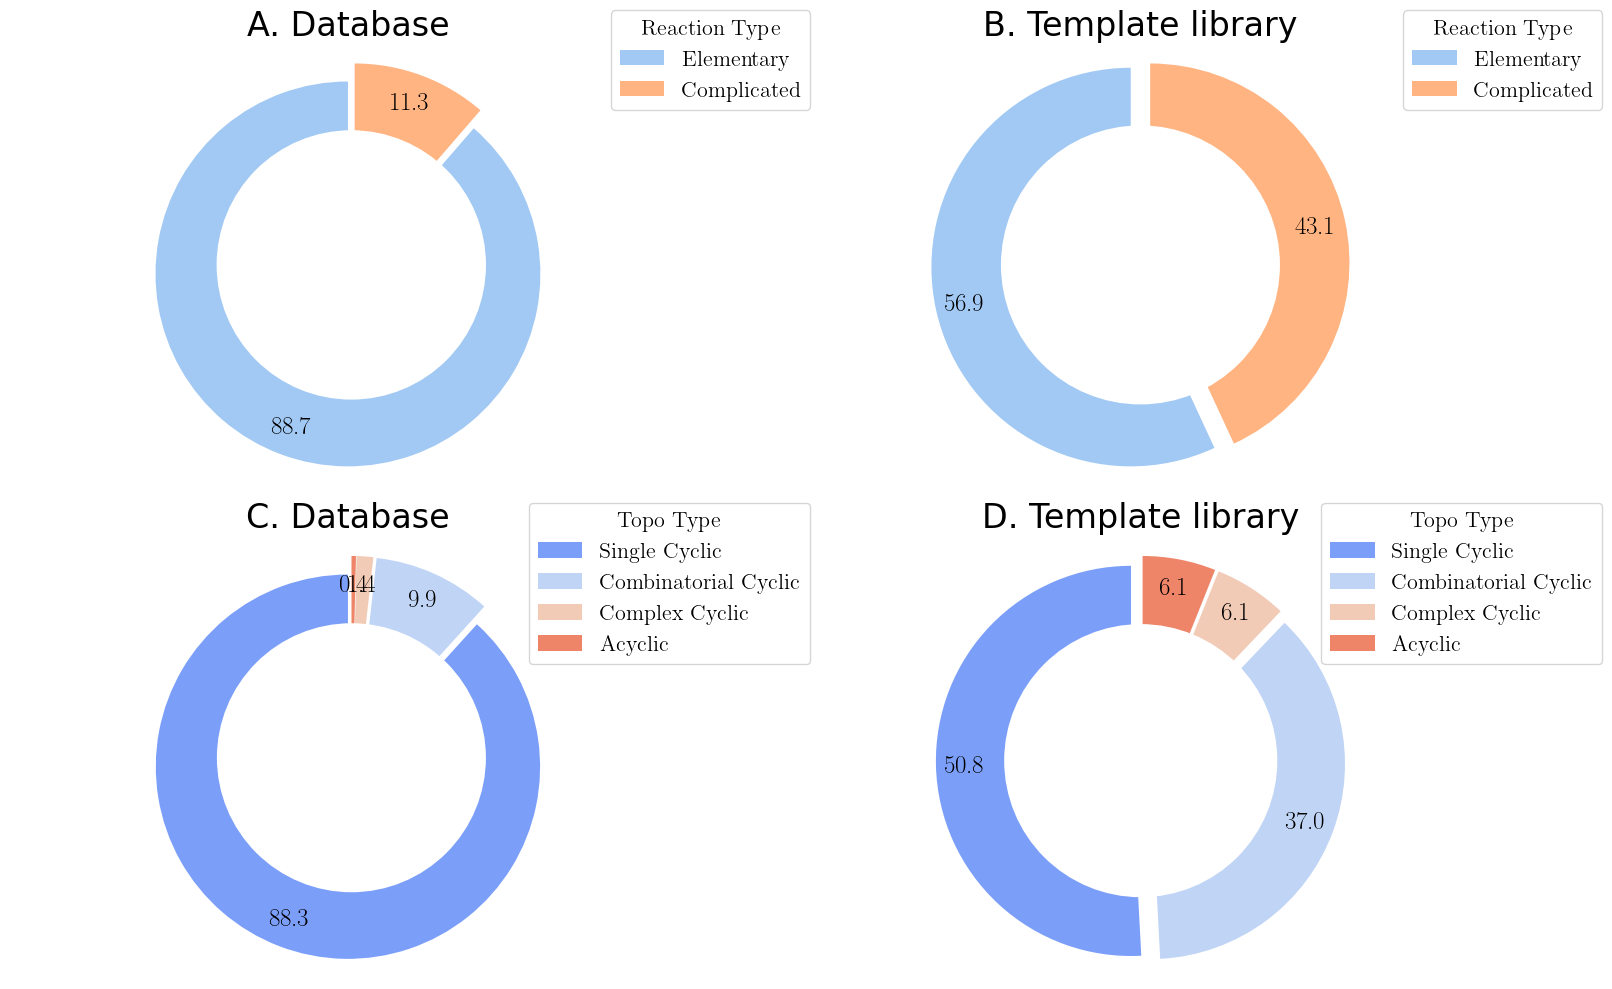

In [16]:
from _analysis import create_pie_chart, plot_heatmap
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # Adjust size as needed

# Plot the pie chart in the first subplot (top-left)
create_pie_chart(temp_0, 'Reaction Type', ax=axs[0, 1], title='B. Template library', color_pallet='pastel')

create_pie_chart(data_cluster, 'Reaction Type', ax=axs[0, 0], title= 'A. Database', color_pallet='pastel')

create_pie_chart(temp_0, 'Topo Type', ax=axs[1, 1], title='D. Template library', color_pallet='coolwarm')

create_pie_chart(data_cluster, 'Topo Type', ax=axs[1, 0], title='C. Database', color_pallet='coolwarm')

# create_pie_chart(temp_0, 'Reaction Step', ax=axs[2, 0], title='E. Template library', color_pallet='coolwarm')

# create_pie_chart(data_cluster, 'Reaction Step', ax=axs[2, 1], title='F. Database', color_pallet='coolwarm')


plt.tight_layout()
plt.savefig('../../Docs/Analysis/fig/Analysis_rtype_topo.pdf', dpi = 600)
plt.show()


<Axes: title={'center': 'D. Database'}>

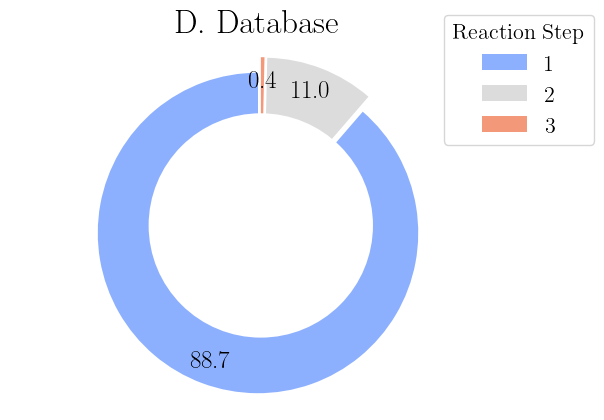

In [17]:
create_pie_chart(data_cluster, 'Reaction Step', ax=None, title='D. Database', color_pallet='coolwarm')

<Axes: title={'center': 'D. Database'}>

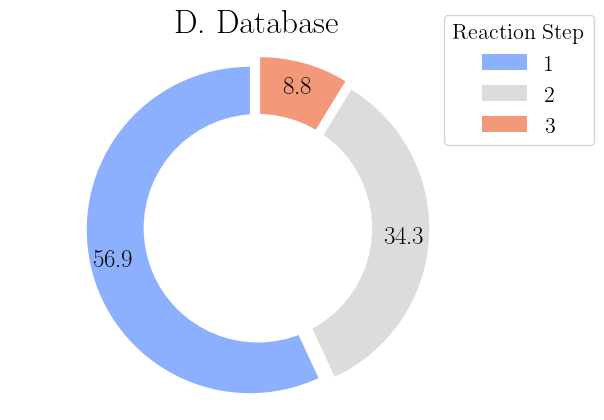

In [18]:
create_pie_chart(, 'Reaction Step', ax=None, title='D. Database', color_pallet='coolwarm')

## Distribution

In [13]:
from _analysis import count_column_values, plot_rules_distribution

In [14]:
element = [value for value in temp_0 if value['Reaction Type'] in ['Elementary']]
complex = [value for value in temp_0 if value['Reaction Type'] in ['Complicated']]
element_count = count_column_values(element, 'Rings')
complex_count = count_column_values(complex, 'Rings')

In [15]:
element_all = [value for value in data_cluster if value['Reaction Type'] in ['Elementary']]
complex_all = [value for value in data_cluster if value['Reaction Type'] in ['Complicated']]
element_count_all = count_column_values(element_all, 'Rings')
complex_count_all = count_column_values(complex_all, 'Rings')

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Optional
from matplotlib.axes import Axes


/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_analysis.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=types_of_rules, y=percentages, palette=color_pallet)
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_analysis.py:180: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_analysis.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=types_of_rules, y=percentages, palette=color_pallet)
/homes/bie

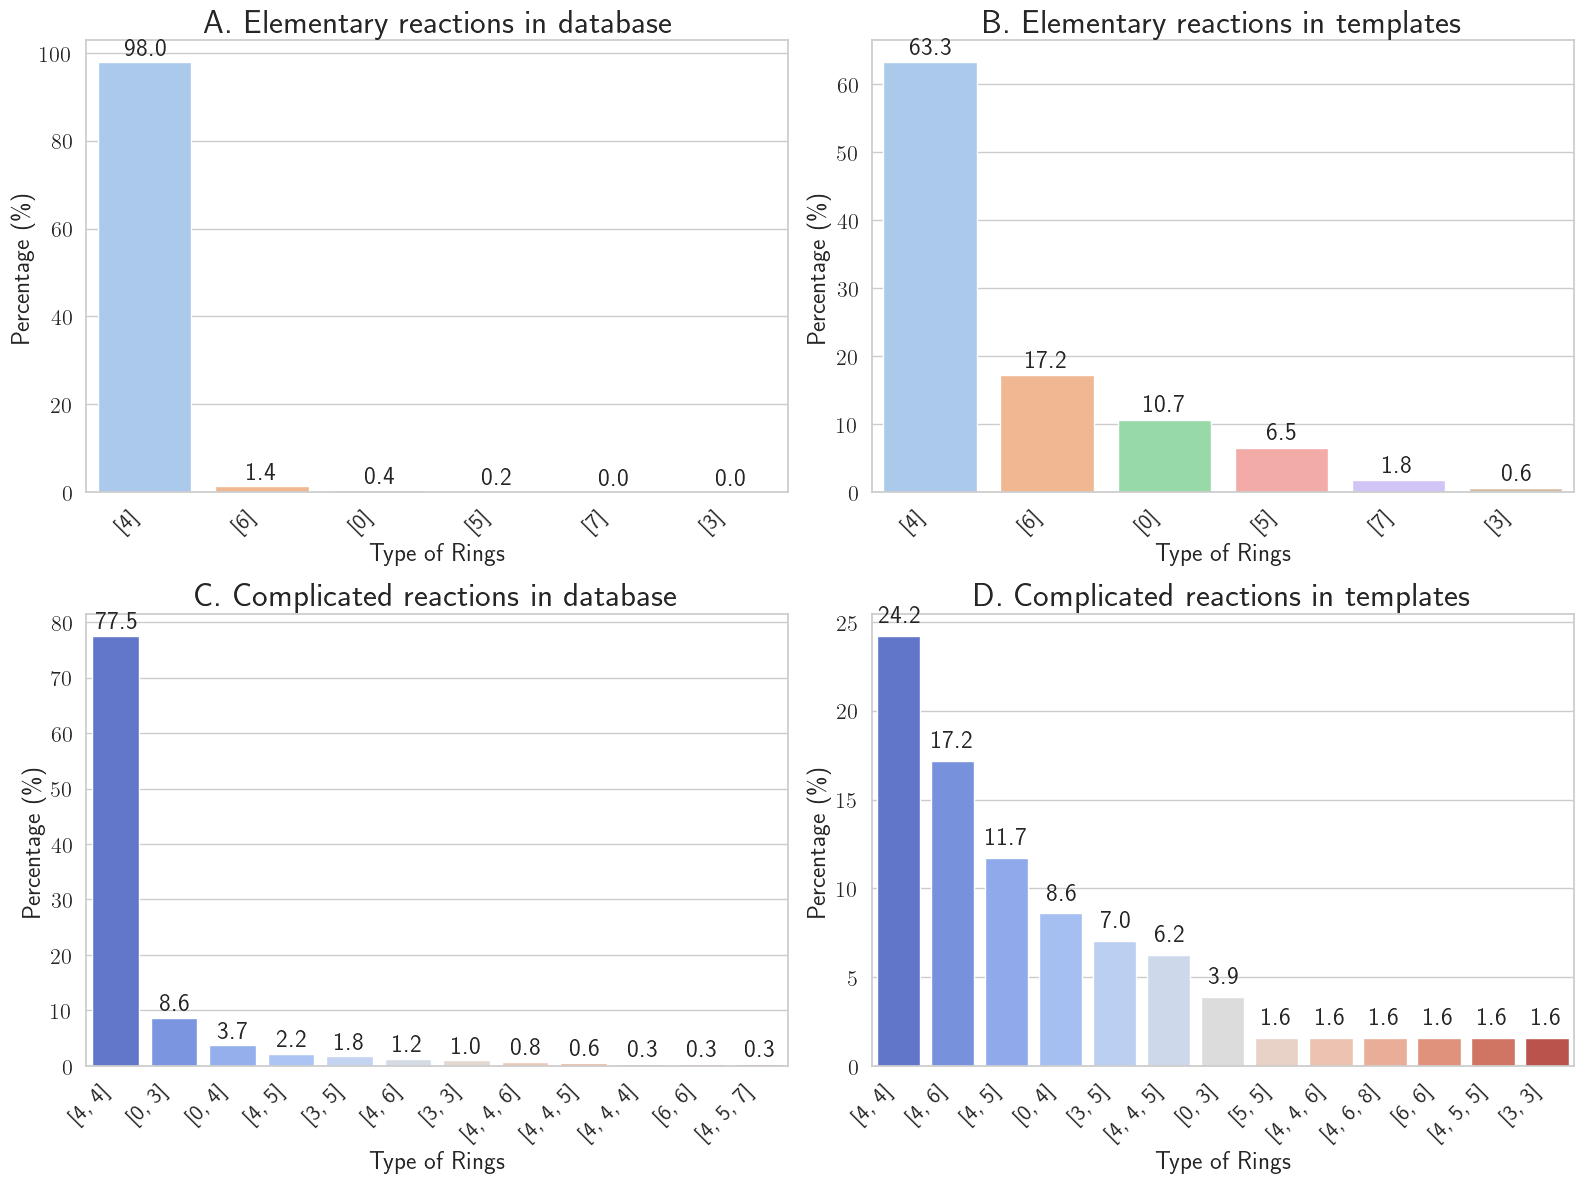

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))  


plot_rules_distribution(element_count, ax=axs[0, 1], title='B. Elementary reactions in templates', color_pallet= 'pastel')
plot_rules_distribution(element_count_all, ax=axs[0, 0], title='A. Elementary reactions in database', color_pallet= 'pastel')
plot_rules_distribution(complex_count, ax=axs[1, 1], title='D. Complicated reactions in templates', refinement=True, color_pallet= 'coolwarm')
plot_rules_distribution(complex_count_all, ax=axs[1, 0], title='C. Complicated reactions in database', refinement=True, color_pallet= 'coolwarm', threshold = 0.3)


plt.tight_layout()
plt.savefig('../../Docs/Analysis/fig/rings_type.pdf', dpi = 600)
plt.show()


## Heatmap

In [ ]:
df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'temp_0' is your initial DataFrame
df = pd.DataFrame(temp_0)
df['Percentage'] = 1  # Assuming this setup for simplification

# Convert 'Rings' to a tuple if it's a list of integers (no need to encode these)
df['Rings'] = df['Rings'].apply(lambda x: tuple(x))

# Aggregate data based on 'Reaction Step' and 'Rings' while summing up 'Percentage'
aggregated_data = df.groupby(['Reaction Step', 'Rings']).agg({
    'Percentage': 'sum'
}).reset_index()

# Pivot data for heatmap
# Using 'Rings' as columns and 'Reaction Step' as the index
heatmap_data = aggregated_data.pivot_table(
    index='Reaction Step',
    columns='Rings',
    values='Percentage',
    fill_value=0  # Fill missing values with 0
)

# Customize the clustermap
g = sns.clustermap(heatmap_data, cmap='coolwarm', standard_scale=1, figsize=(12, 10),
                   row_cluster=True, col_cluster=True)  # Enable clustering to show natural groupings
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Improve x labels readability
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Improve y labels readability

# Enhance with detailed labels and titles
plt.title('Hierarchical Clustering by Reaction Steps and Rings Composition', pad=90)
g.ax_heatmap.set_xlabel('Ring Compositions')
g.ax_heatmap.set_ylabel('Reaction Steps')

# Add colorbar label
g.cax.set_title('Percentage')

plt.show()


In [ ]:
temp_0[0]

## Time Benchmark for Rule Clustering

In [ ]:
hier = [58.9, 47.21, 90.92, 101.66]
emp = [57.82, 275.02, 1807.58, 1807.58]

In [19]:
from datetime import datetime

# Define the two timestamps
timestamp1 = "2024-07-22 09:45:52,500"
timestamp2 = "2024-07-22 10:08:45,738"

# Convert the strings to datetime objects
format_str = "%Y-%m-%d %H:%M:%S,%f"
time1 = datetime.strptime(timestamp1, format_str)
time2 = datetime.strptime(timestamp2, format_str)

# Calculate the difference in seconds
difference = (time2 - time1).total_seconds()
difference


1373.238

In [21]:
1373.238/40012

0.03432065380385885

In [ ]:
0.034

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
radius = [0, 1, 2, 3]
hier = [58.9, 47.21, 90.92, 101.66]
emp = [57.82, 275.02, 1807.58, 1807.58]

hier = [value/60 for value in hier]
emp = [value/60 for value in emp]

# Setup the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Bar plot for pairwise comparison
x = np.arange(len(radius))  # the label locations
width = 0.35  # the width of the bars

# Create bars for each method at each radius
rects1 = ax[0].bar(x - width/2, hier, width, label='Hierarchical')
rects2 = ax[0].bar(x + width/2, emp, width, label='Empirical')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xlabel('Radius')
ax[0].set_ylabel('Time (seconds)')
ax[0].set_title('Processing Time Comparison by Method and Radius')
ax[0].set_xticks(x)
ax[0].set_xticklabels(radius)
ax[0].legend()

# Subplot 2: Cumulative line plot
ax[1].plot(radius, np.cumsum(hier), marker='o', label='Hierarchical')
ax[1].plot(radius, np.cumsum(emp), marker='o', label='Empirical')

ax[1].set_xlabel('Radius')
ax[1].set_ylabel('Cumulative Time (seconds)')
ax[1].set_title('Cumulative Processing Time by Radius')
ax[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [ ]:
data = [
    {'Type': 'Hierarchical', 'R0': f'{58.9 / 60:.2f}', 'R1': f'{47.21 / 60:.2f}', 'R2': f'{90.92 / 60:.2f}', 'R3': f'{101.66 / 60:.2f}'},
    {'Type': 'Empirical', 'R0': f'{57.82 / 60:.2f}', 'R1': f'{275.02 / 60:.2f}', 'R2': f'{1807.58 / 60:.2f}', 'R3': f'{5675.54 / 60:.2f}'}
]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

def plot_bar_compare(data, ax, title="Processing Time by Method and Radius", show_values=True):
    plt.rc('text', usetex=True)  # Enable LaTeX rendering
    plt.rc('font', family='serif')  # Optional: set the default font family to serif

    types = [item['Type'] for item in data]
    R_labels = ['R0', 'R1', 'R2', 'R3']  # Simple labels to match dictionary keys
    formatted_R_labels = [r'$R_{0}$', r'$R_{1}$', r'$R_{2}$', r'$R_{3}$']  # LaTeX formatted labels for display
    colors = ['#3A8EBA', '#F4A582']  # Reduced color palette
    n_types = len(types)
    index = np.arange(len(R_labels))  # One group per radius
    bar_width = 0.35  # Width of each bar

    # Prepare custom legend handles
    legend_handles = []

    # Loop through each type
    for i, typ in enumerate(types):
        # Collect values for this type across all radii using simple R_labels to match dictionary keys
        means = [float(data[i][r]) for r in R_labels]
        bars = ax.bar(index + i * bar_width, means, bar_width, color=colors[i % len(colors)], label=typ)

        # Add custom legend handle
        legend_handles.append(Patch(facecolor=colors[i % len(colors)], label=r'{' + typ + '}'))  # LaTeX in legend

        # Optionally add values on top of the bars
        if show_values:
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize = 16)

    # Configuring the axis
    ax.set_ylabel('Time (minutes)', fontsize=18)
    ax.set_title(r'{A. ' + title + '}', fontsize=20, weight = 'medium')  
    ax.set_xticks(index + bar_width / 2 * (n_types - 1))
    ax.set_xticklabels(formatted_R_labels, fontsize = 16)  # Use LaTeX formatted labels for display
    ax.tick_params(axis='y', labelsize=16)
    ax.legend(handles=legend_handles, fontsize=16)  # Use custom legend handles with LaTeX formatting



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
plot_bar_compare(data, ax)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cumulative_line(ax, radius, hier, emp, colors=['#3A8EBA', '#F4A582']):
    """
    Plot cumulative line plots for hierarchical and empirical data with specific colors.

    Parameters:
    ax (matplotlib.axes.Axes): The axes on which to plot.
    radius (array-like): The radius values.
    hier (array-like): The hierarchical data.
    emp (array-like): The empirical data.
    colors (list of str): Colors for each dataset.
    """
    plt.rc('text', usetex=True)  # Enable LaTeX rendering
    plt.rc('font', family='serif')  # Optional: use serif font

    # Plot cumulative line plots with specified colors
    sns.lineplot(ax=ax, x=radius, y=np.cumsum(hier), color=colors[0], label='Hierarchical', linewidth=2,)
    sns.lineplot(ax=ax, x=radius, y=np.cumsum(emp), color=colors[1], label='Empirical', linewidth=2)
    
    # Set axis labels and title with LaTeX formatting
    #ax.set_xlabel(r'\textbf{Radius}', fontsize=12)  # Bold label
    ax.set_ylabel(r'{Cumulative Time (minutes)}', fontsize=18)
    ax.set_title(r'{B. Cumulative Processing Time by Radius}', fontsize=20)

    # Set x-ticks and labels with LaTeX formatting
    ax.set_xticks(radius)
    ax.set_xticklabels([r'$R_{0}$', r'$R_{1}$', r'$R_{2}$', r'$R_{3}$'], fontsize=16)
    ax.tick_params(axis='y', labelsize=16)

    # Add legend with font settings
    ax.legend(fontsize=16) 


# Plotting
fig, axes = plt.subplots(figsize=(12, 6))
radius = [0, 1, 2, 3]
hier = [58.9, 47.21, 90.92, 101.66]
hier = [round(value/60, 2) for value in hier]
emp = [57.82, 275.02, 1807.58, 5675.54]
emp = [round(value/60, 2) for value in emp]
# Plot on the first subplot for demonstration

plot_cumulative_line(axes, radius, hier, emp)



In [ ]:
# Example usage
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
radius = [0, 1, 2, 3]
hier = [58.9, 47.21, 90.92, 101.66]
hier = [round(value/60, 2) for value in hier]
emp = [57.82, 275.02, 1807.58, 5675.54]
emp = [round(value/60, 2) for value in emp]
# Plot on the first subplot for demonstration
plot_bar_compare(data, axes[0])
plot_cumulative_line(axes[1], radius, hier, emp)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('../../Docs/Analysis/fig/time_cluster.pdf', dpi = 600)
plt.show()

## Rule Composition

In [ ]:
import sys
sys.path.append('../../')
from SynTemp.SynUtils.utils import load_from_pickle
data = load_from_pickle('../../Data/Bio/data_cluster.pkl.gz')


In [ ]:
data

In [ ]:
import pickle

def load_from_pickle(filename: str):
    """
    Load data from a pickle file.

    Parameters:
    filename (str): The name of the pickle file to load data from.

    Returns:
    List[Any]: The data loaded from the pickle file.
    """
    with open(filename, "rb") as file:
        return pickle.load(file)

In [ ]:
from SynTemp.SynVis.chemical_graph_visualizer import ChemicalGraphVisualizer

vis_graph = ChemicalGraphVisualizer(42)
vis_graph.vis_three_graph(data[0]['ITSGraph'])

In [ ]:
save_path = 'Data/Bio/GML'

In [ ]:
from SynTemp.SynRule.rule_writing import RuleWriting
write = RuleWriting()
check  = write.auto_extraction(data, rule_column='ITSGraph', save_path=save_path)

In [ ]:
from SynTemp.SynUtils.utils import load_database
original = load_database('../../Data/Bio/aam.json.gz')

In [ ]:
len(data)

In [ ]:
data